<a href="https://colab.research.google.com/gist/talhaim11/026d37e58b16a7fc8b4db574d868b3ff/pneumonia-detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library Imports**

In [ ]:

import pandas as pd
import numpy as np
import os
import pathlib
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

Tensorflow and Keras 

Functions from tf.keras that are necessary to build and optimize our model.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import datasets, layers, models

#Types of NN layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, MaxPooling2D, AveragePooling2D ,Conv2D

from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint 

#Model compiling
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

#Data Augmentaion
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow import image

#Preformance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from tensorflow.keras.utils import plot_model

#Transfer learning 
from glob import glob
from keras.applications import resnet
from keras.applications.resnet import ResNet50

## **Data Import & Preproccesing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!unrar x /content/drive/MyDrive/deeplearning_test_file.rar

Streaming output truncated to the last 5000 lines.
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0449-0001.jpeg            17%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0450-0001.jpeg            17%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0451-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0452-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0453-0001-0002.jpeg       18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0453-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0455-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0456-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0457-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונות/train/NORMAL/IM-0458-0001.jpeg            18%  OK 
Extracting  בדיקה של מעט תמונ

---
Transfer Learning
---
---

In [ ]:
train_directory = '/content/בדיקה של מעט תמונות/train'
train_directory_classes = glob('/content/בדיקה של מעט תמונות/train')
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='grayscale', 
    batch_size=32, 
    image_size=(224,224), 
    shuffle=True, seed=3, validation_split=0.15, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)




Found 5232 files belonging to 2 classes.
Using 4448 files for training.


In [ ]:
test_directory = '/content/בדיקה של מעט תמונות/test'

test_data = tf.keras.utils.image_dataset_from_directory(
    test_directory, 
    labels='inferred', 
    label_mode='binary',
    class_names=None, 
    color_mode='grayscale', 
    image_size=(256,256), 
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)

Found 624 files belonging to 2 classes.


In [ ]:
RGB_train_data = tf.image.grayscale_to_rgb(
    train_data,
    name=None)

AttributeError: ignored

In [ ]:
IM_SZ = [224,224  ]
res = ResNet50(input_shape=IM_SZ + [3],weights='imagenet',include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in res.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(res.output)
M_Output = Dense(len(train_directory_classes), activation='sigmoid')(x)

Creating train, validation and test sets out of the dataset.



Normalizing the data sets:

In [ ]:
def normalize_data(train_data, test_data):
    normalization_layer = tf.keras.layers.Rescaling(1. / 255)
    normalized_train = train_data.map(lambda x, y: (normalization_layer(x), y))
    normalized_test = test_data.map(lambda x, y: (normalization_layer(x), y))
    return(train_data, test_data)
    train_data, test_data = normalize_data(train_data, test_data)

## **Classifying Deep Neural Network (DNN)**

In [ ]:
Transfer_Learning_Model = Model(inputs=res.input, outputs=M_Output)

Transfer_Learning_Model.summary()

In [ ]:
Transfer_Learning_Model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = Transfer_Learning_Model.fit(train_data, epochs=50)

Epoch 1/50


ValueError: ignored

In [ ]:
BasicModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2097184   
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,097,217
Trainable params: 2,097,217
Non-trainable params: 0
_________________________________________________________________


Loss and accuracy evaluation

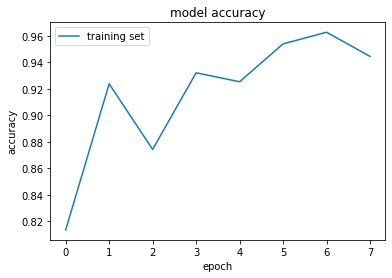

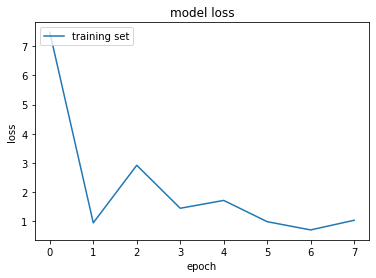

In [ ]:
plt.plot(Transfer_Learning_Model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

plt.plot(Transfer_Learning_Model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

Final test evaluation

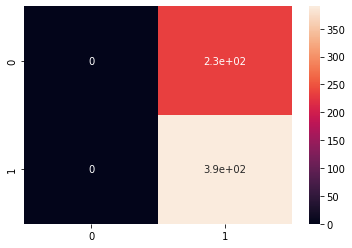

In [ ]:
from numpy.core.fromnumeric import round_
import seaborn as sns
BasicPrediction = np.round(BasicModel.predict(test_data))
test_label = np.concatenate([y for x, y in test_data], axis=0) 
cm = confusion_matrix(test_label, BasicPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True)


In [ ]:
print(BasicPrediction)

In [ ]:
print("The test recall Score: ", recall_score(test_label, BasicPrediction, average='macro'))
print("The test recision Score: ", precision_score(test_label, BasicPrediction, average='macro'))

The test recall Score:  0.5
The test recision Score:  0.3125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Creating a convolutional neural network (CNN)**

In [ ]:
CNN = Sequential()
CNN.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(256, 256, 1)))

#Maximzing the image (pixels) and reducing it's size by half in order to obatin the important and relevant
#informaion and ignore less informative pixels.
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))
CNN.add(layers.Conv2D(64, kernel_size=(3,3)))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))

#Flatteing the output into an arrray for the dense layers.
CNN.add(layers.Flatten())
CNN.add(layers.Dense(30, activation="relu"))
CNN.add(layers.Dense(1, activation="sigmoid"))

CNN.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = CNN.fit(train_data, epochs=5)

Epoch 1/5
139/139 [==============================] - 28s 187ms/step - loss: 105.6876 - accuracy: 0.8329
Epoch 2/5
139/139 [==============================] - 26s 181ms/step - loss: 9.0156 - accuracy: 0.9540
Epoch 3/5
139/139 [==============================] - 26s 178ms/step - loss: 7.0076 - accuracy: 0.9508
Epoch 4/5
139/139 [==============================] - 26s 178ms/step - loss: 2.0459 - accuracy: 0.9743
Epoch 5/5
139/139 [==============================] - 26s 178ms/step - loss: 1.0495 - accuracy: 0.9826


In [ ]:
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_8 (Dense)             (None, 30)               

Loss and accuracy evaluation

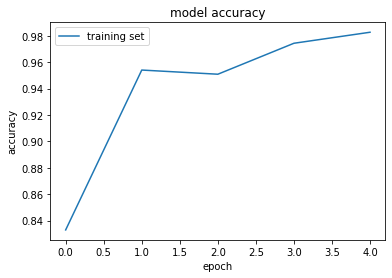

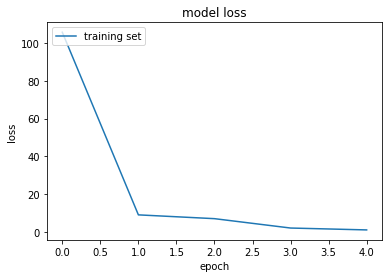

In [ ]:
plt.plot(CNN.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

plt.plot(CNN.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

Final test evaluation

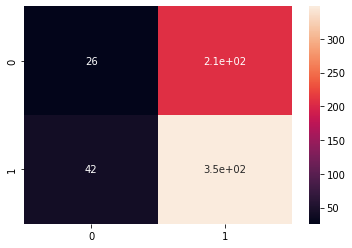

In [ ]:
CNNprediction = np.round(CNN.predict(test_data))
test_label = np.concatenate([y for x, y in test_data], axis=0) 
cm = confusion_matrix(test_label, CNNprediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True)


In [ ]:
print("The test recall Score: ", recall_score(test_label, CNNprediction, average='macro'))
print("The test recision Score: ", precision_score(test_label, CNNprediction, average='macro'))

The test recall Score:  0.49145299145299143
The test recision Score:  0.47936944561997463


## **Hyper-parameters effect on the network**

In [ ]:
Hyp = Sequential()
Hyp.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(256, 256, 1)))
Hyp.add(layers.MaxPooling2D(pool_size=(2,2)))
Hyp.add(layers.Conv2D(64, kernel_size=(3,3)))
Hyp.add(layers.MaxPooling2D(pool_size=(2,2)))
Hyp.add(layers.Flatten())
Hyp.add(layers.Dense(30, activation="relu"))
Hyp.add(layers.Dense(1, activation="sigmoid"))

#The default learing rate must have been a bit too big for the network as it expirenced high loss values on the first epochs.
#Now we will see how decreasing the learning rate can help to create a more stable and moderate model.
Hyp.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = Hyp.fit(train_data, epochs=5)

Epoch 1/5
139/139 [==============================] - 29s 180ms/step - loss: 4.7215 - accuracy: 0.6288
Epoch 2/5
139/139 [==============================] - 26s 179ms/step - loss: 1.7869 - accuracy: 0.7278
Epoch 3/5
139/139 [==============================] - 26s 180ms/step - loss: 1.3348 - accuracy: 0.7749
Epoch 4/5
139/139 [==============================] - 26s 179ms/step - loss: 1.0637 - accuracy: 0.8056
Epoch 5/5
139/139 [==============================] - 26s 179ms/step - loss: 0.8655 - accuracy: 0.8272


In [ ]:
Hyp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 246016)            0         
                                                                 
 dense_12 (Dense)            (None, 30)               

Loss and accuracy evaluation

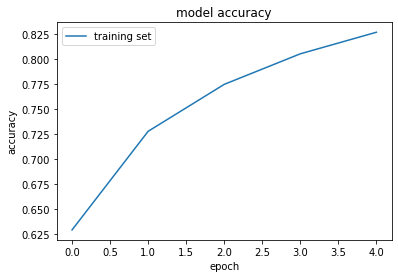

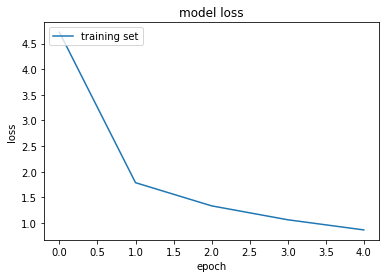

In [ ]:
plt.plot(Hyp.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

plt.plot(Hyp.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

Final test evaluation

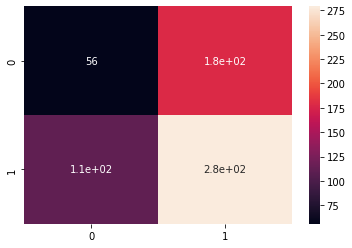

In [ ]:
HypPrediction = np.round(Hyp.predict(test_data))
test_label = np.concatenate([y for x, y in test_data], axis=0) 
cm = confusion_matrix(test_label, HypPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True)


In [ ]:
print("The test recall Score: ", recall_score(test_label, HypPrediction, average='macro'))
print("The test recision Score: ", precision_score(test_label, HypPrediction, average='macro'))

The test recall Score:  0.4773504273504274
The test recision Score:  0.4729163117965382


## **Data augmentation**

Creating a model with a single layer that will flip the entire dataset (simpler than creating a function).


In [ ]:
data_aug = tf.keras.Sequential([                                   
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])


In [ ]:
Aug = Sequential(
    [data_aug]
)
Aug.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(256, 256, 1)))
Aug.add(layers.MaxPooling2D(pool_size=(2,2)))
Aug.add(layers.Conv2D(64, kernel_size=(3,3)))
Aug.add(layers.MaxPooling2D(pool_size=(2,2)))
Aug.add(layers.Flatten())
Aug.add(layers.Dense(30, activation="relu"))
Aug.add(layers.Dense(1, activation="sigmoid"))

Aug.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = Aug.fit(train_data, epochs=5)

Epoch 1/5
139/139 [==============================] - 27s 179ms/step - loss: 2.9464 - accuracy: 0.6288
Epoch 2/5
139/139 [==============================] - 26s 180ms/step - loss: 1.8539 - accuracy: 0.6737
Epoch 3/5
139/139 [==============================] - 26s 180ms/step - loss: 1.5958 - accuracy: 0.6901
Epoch 4/5
139/139 [==============================] - 27s 185ms/step - loss: 1.2877 - accuracy: 0.7289
Epoch 5/5
139/139 [==============================] - 27s 185ms/step - loss: 1.0655 - accuracy: 0.7709


In [ ]:
Aug.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 1)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 246016)           

Evaluating the effect of data augmentation on the model

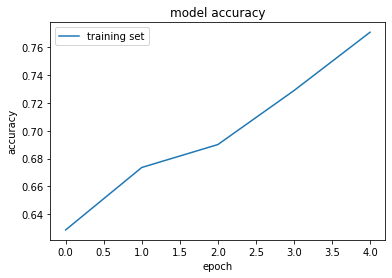

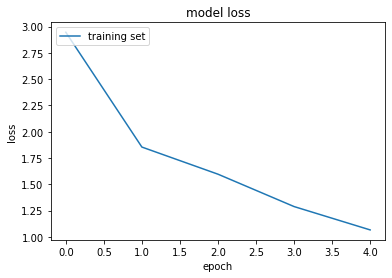

In [ ]:
plt.plot(Aug.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

plt.plot(Aug.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

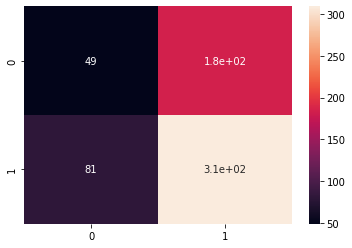

In [ ]:
AugPrediction = np.round(Aug.predict(test_data))
test_label = np.concatenate([y for x, y in test_data], axis=0) 
cm = confusion_matrix(test_label, AugPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True)


In [ ]:
print("The test recall Score of the Aug model:", recall_score(test_label, AugPrediction, average='macro'), "\n The regular model:", recall_score(test_label, HypPrediction, average='macro'))
print("The test recision Score of the Aug model:", precision_score(test_label, AugPrediction, average='macro'), "\n The the regular model: ", precision_score(test_label, HypPrediction, average='macro') )

The test recall Score of the Aug model: 0.5008547008547009 
 The regular model: 0.49444444444444446
The test recision Score of the Aug model: 0.5012145748987854 
 The the regular model:  0.4933568311953773
